In [ ]:
%pip install -r requirements.txt

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
df = pd.read_csv("epa-sea-level.csv")

df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


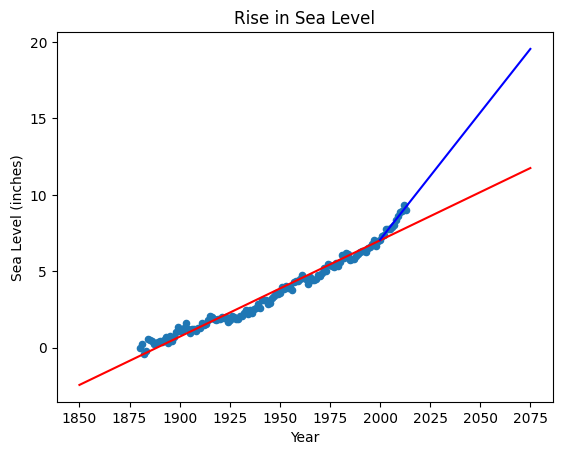

In [71]:
fig, ax = plt.subplots()

df.plot(ax=ax, x='Year', y='CSIRO Adjusted Sea Level', kind='scatter')

res = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

# numpy array with years 1850 - 2075
year_range = np.arange(1850, 2100, 25)

ax.set_xticks(year_range)

ax.plot(year_range, res.intercept + res.slope*year_range, 'r')

df_recent = df[( (df['Year'] >= 2000) ) & ( df['Year'] <= df['Year'].max() )]

res_recent = linregress(x=df_recent['Year'], y=df_recent['CSIRO Adjusted Sea Level'])

year_range_recent = np.arange(2000, 2100, 25)
ax.plot(year_range_recent, res_recent.intercept + res_recent.slope*year_range_recent, 'b')

ax.set_title("Rise in Sea Level")
ax.set_ylabel('Sea Level (inches)')

plt.show()
